# Vis: Scatterplots and Layers

*Purpose*: *Scatterplots* are a key tool for EDA. Scatteplots help us inspect the relationship between two variables. To enhance our scatterplots, we'll learn how to use *layers* in ggplot to add multiple pieces of information to our plots.


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

We'll use the diamonds and mpg datasets in this exercise.


In [2]:
from grama.data import df_diamonds
from plotnine.data import mpg as df_mpg

# Introduction

## Scatterplots

So far, we have focused on studying one variable at a time using bars/columns:


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 142'. Pick better value with 'binwidth'.


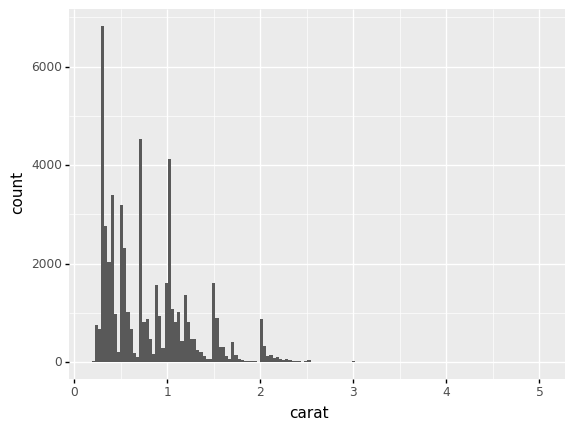

<ggplot: (8776099688867)>

In [3]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat"))
    + gr.geom_histogram()
)

This gives us a sense of how a *single* variable is distributed in a dataset, but it gives us no sense for how `carat` relates to other variables. 

A scatterplot helps us to see relationships between two variables. A scatterplot shows two variables on the `x` and `y` aesthetics, and visualizes observations using one point per observation. Thus, in ggplot, we use the geometry `gr.geom_point()` to construct a scatterplot.


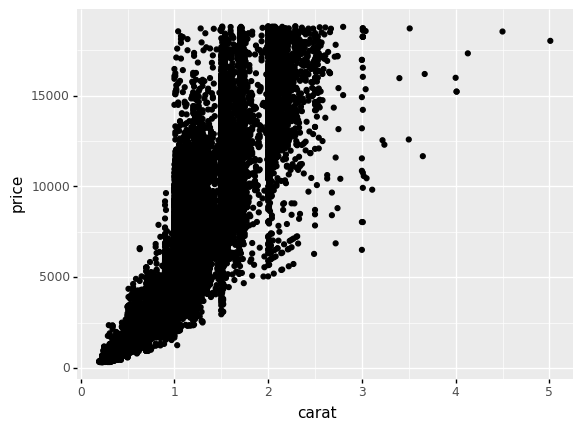

<ggplot: (8776129725630)>

In [4]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat", y="price"))
    + gr.geom_point()
)

### __q1__ How do `price` and `carat` relate?

Use the plot above to answer the questions under *Observations*.


*Observations*

- How does `price` tend to change as `carat` increases? Is this trend linear or nonlinear?
  - Generally, `price` increases with `carat`. This trend is certainly nonlinear; we see the increase in price grow faster at higher `carat` values.
- Consider diamonds with `carat == 2.0`. What range of `price` do you see for this kind of diamond? Is `carat` *alone* able to predict the `price` of a diamond?
  - We see a range of about `5,000` to about `18,000`. Since we see such a wide range, it is clear that `carat` alone is not able to predict `price`.
<!-- solution-end -->

### Overplotting

With larger datasets, it is possible for many observations to "land" in the same `x, y` location on a scatterplot. For instance, with the following (silly) dataset, we get the false impression that there are only two points:


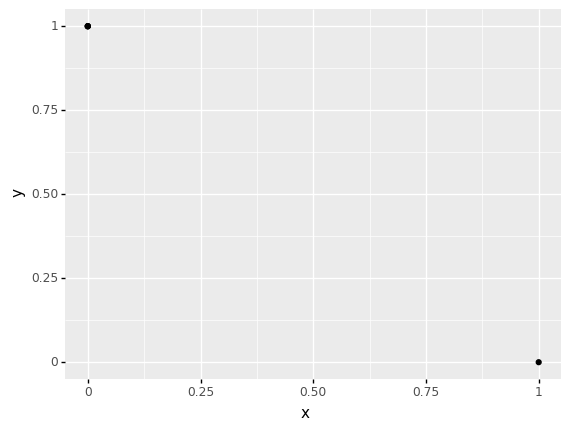

<ggplot: (8776129768189)>

In [5]:
## NOTE: No need to edit
(
    gr.df_make(
        x=[0,0,0,0,1],
        y=[1,1,1,1,0],
    )
    
    >> gr.ggplot(gr.aes(x="x", y="y"))
    + gr.geom_point()
)

There are various ways to visually indicate the *number* of observations at each point; a simple way is to use size to denote count, as with `gr.geom_count()`.

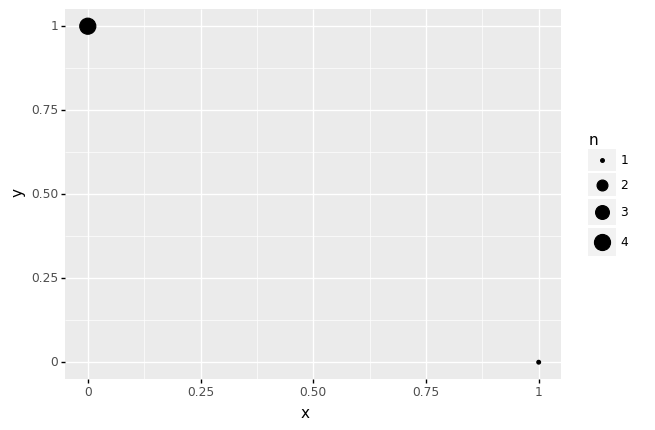

<ggplot: (8776099776802)>

In [6]:
## NOTE: No need to edit
(
    gr.df_make(
        x=[0,0,0,0,1],
        y=[1,1,1,1,0],
    )
    
    >> gr.ggplot(gr.aes(x="x", y="y"))
    + gr.geom_count()
)

### __q2__ Use `gr.geom_count()`

Replace `gr.geom_point()` with `gr.geom_count()` in the following plot. Answer the questions under *observations* below.


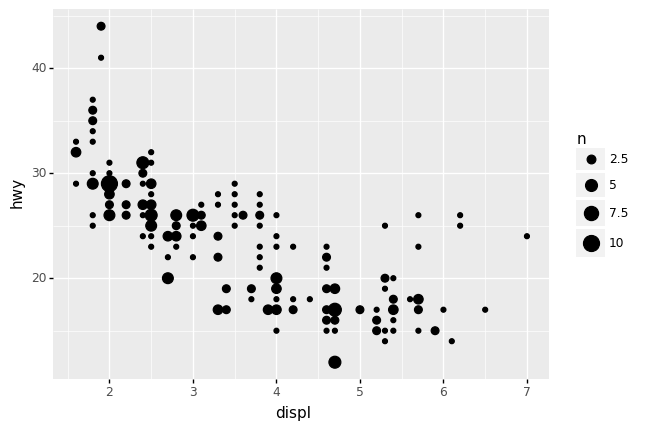

<ggplot: (8776111791318)>

In [7]:
## TASK: Replace gr.geom_point() with gr.geom_count()
(
    df_mpg
    >> gr.ggplot(gr.aes(x="displ", y="hwy"))

    + gr.geom_count()
)

*Observations*

- With `gr.geom_point()`, how evenly spread do the observations seem to be?
  - The observations *appear* to be evenly spread across `displ`; there are a few fewer points at higher `displ` values, but not by much.
- With `gr.geom_count()`, how evenly spread do the observations seem to be?
  - The observations appear to concentrate in a "band" curving from around `displ == 2` to `displ == 6`. The points off of this band (around `displ == 3.5, hwy == 28` and `displ == 6.0, hwy == 25`) are far more sparse.
- What does `gr.geom_point()` hide in this case?
  - Visualizing with points (not counts) hides the multiple observations at each point; with points we cannot see the concentrated "band".
<!-- solution-end -->

To deal with overplotting, we can also make points *transparent*. Then overlapping points will tend to appear darker, giving us the means to see where there are more points.


### __q3__ Use the `alpha` option

Adjust the `alpha` option in `gr.geom_point()` to better understand where observations concentrate. Answer the questions under *observations* below.


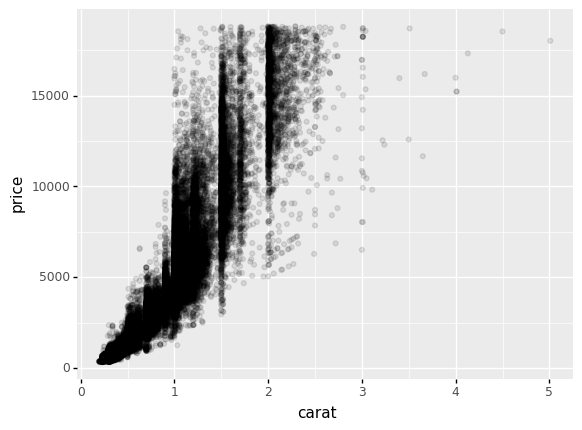

<ggplot: (8776077910291)>

In [8]:
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat", y="price"))
    + gr.geom_point(

        alpha=1/10,
    )
)

*Observations*

- Do observations tend to concentrate at "special" values? If yes, do they concentrate at values in `carat`, in `price` or in both?
  - Yes; observations tend to concentrate at "special" values of `carat`. We can see this by the vertical "streaks" of points, indicating that values tend to concentrate at special values in `carat`. We do not see the same kinds of patterns in `price`---we see more uniform variability in this variable..
<!-- solution-end -->

## *Layers* in ggplot

Now is a great time to learn some of the more powerful features of ggplot. We'll take advantage of the *layer* functionality to construct more informative plots.


### Default aesthetic order

So far, we have specified the aesthetic names explicitly in `gr.aes()` with calls like `gr.aes(x="carat", y="price")`. However, we can save ourselves a bit of typing by using the *order* of the arguments. The default order of arguments in `gr.aes()` is `x, y`. 

Thus, we can re-write the following:

```python
(
    df_data
    >> gr.ggplot(gr.aes(x="var1", y="var2"))
    + gr.geom_point()
)
```

With slightly shorter code:

```python
(
    df_data
    ## NOTE: The `x=` and `y=` are dropped
    >> gr.ggplot(gr.aes("var1", "var2"))
    + gr.geom_point()
)
```


### __q4__ Use the default order

Re-write the following code to use the default `x,y` order in `gr.aes()`.


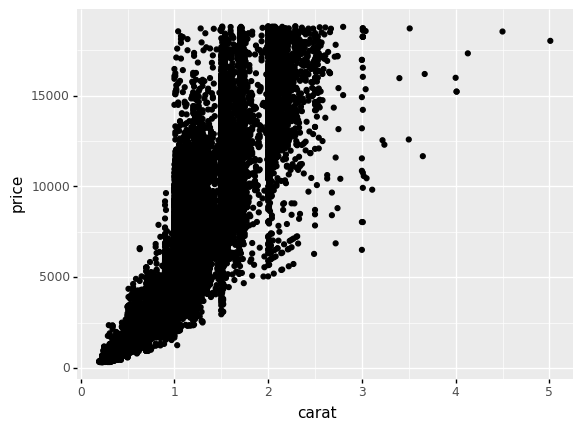

<ggplot: (8776078426832)>

In [9]:
## TASK: Re-write this code to use the default order
(
    df_diamonds
    >> gr.ggplot(gr.aes(

        "carat",
        "price",
    ))
    + gr.geom_point()
)

### Default data

Every geometry in a ggplot object also takes a `data` argument. By default all geometries visualize the same dataset, but we can override that default with the `data` argument. This is helpful if we want to highlight particular observations; for instance, the code below highlights all diamonds that have `carat == 1.0`.


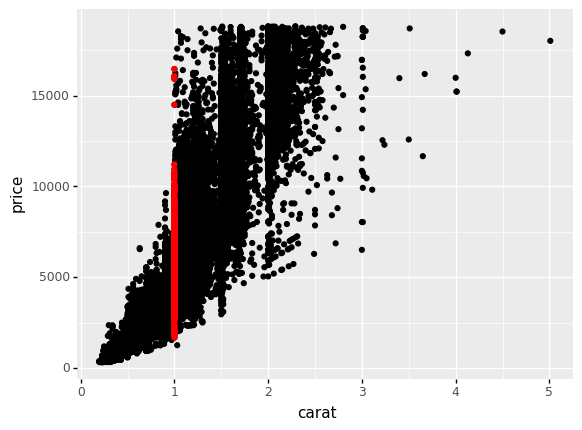

<ggplot: (8776078416782)>

In [10]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point()
    + gr.geom_point(
        ## NOTE: This overrides the data to plot
        data=df_diamonds
        >> gr.tf_filter(DF.carat == 1.0),
        color="red",
    )
)

This is made even more flexible when we combine data operations such as a summary; the following plot shows highway fuel economy against engine displacement for a variety of car classes, but also shows the *mean* performance within each group as a larger dot:


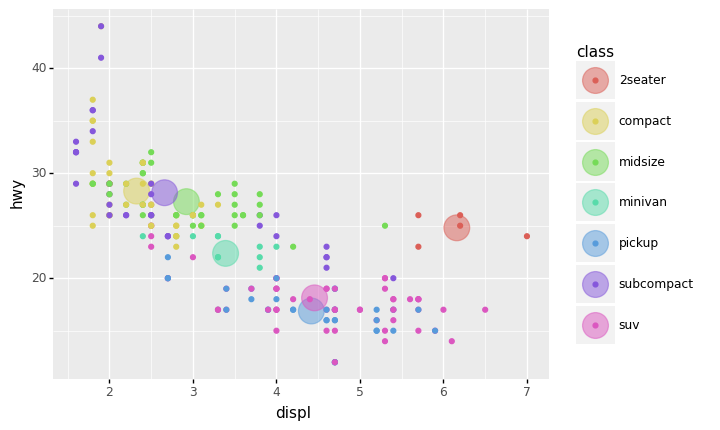

<ggplot: (8776133149678)>

In [11]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy", color="class"))
    + gr.geom_point(
        data=df_mpg
        >> gr.tf_group_by("class")
        >> gr.tf_summarize(displ=gr.mean(DF.displ), hwy=gr.mean(DF.hwy)),
        size=10,
        alpha=1/2,
    )
    + gr.geom_point()
)

Such a plot helps us to compare both typical (mean) behavior and variation in the same plot.


### Layer Order

The order in which you add geometries to a ggplot is the order in which they are drawn. You can use this to "stack" visual elements in a desirable order.

For instance; here's the same diamonds plot from above with `carat == 1.0` highlighted, but with the order of the layers reverse.


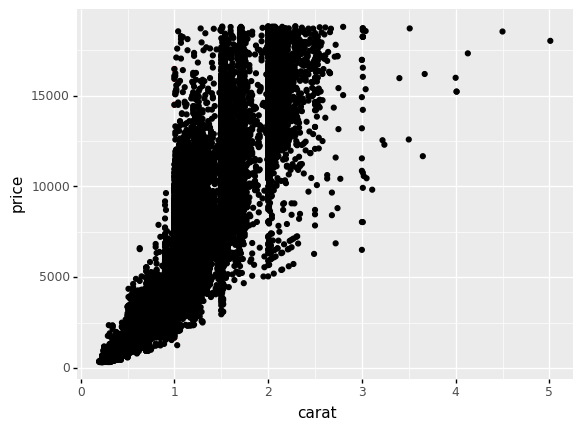

<ggplot: (8776133143775)>

In [12]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(
        data=df_diamonds
        >> gr.tf_filter(DF.carat == 1.0),
        color="red",
    )
    ## NOTE: The full dataset comes last
    + gr.geom_point()
)

Note that we cannot see the additional layer at all! Overplotting is preventing us from seeing the lower layer. As before, we could use `alpha` to make more of the plot visible.

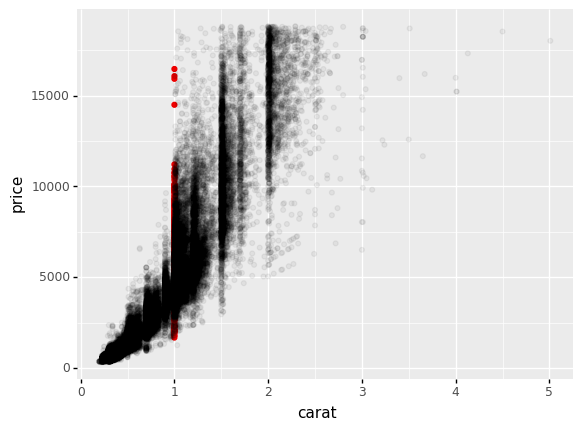

<ggplot: (8776130955255)>

In [13]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(
        data=df_diamonds
        >> gr.tf_filter(DF.carat == 1.0),
        color="red",
    )
    ## NOTE: The full dataset comes last
    + gr.geom_point(alpha=1/20)
)

An even more effective use of this functionality is to use layers to *highlight* particular observations; for instance, some of the more extreme cases in the dataset:


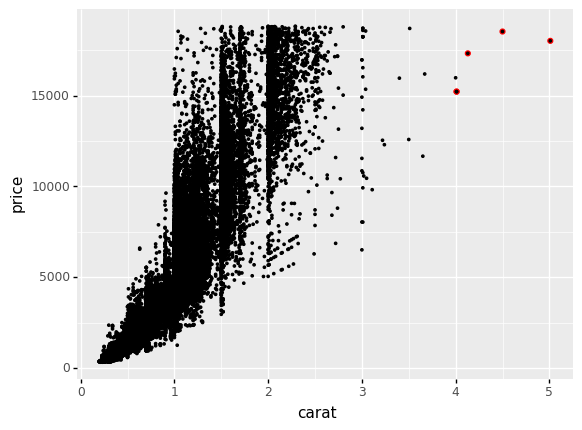

<ggplot: (8776129905924)>

In [14]:
## NOTE: No need to edit
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(
        data=df_diamonds
        >> gr.tf_filter(DF.carat > 4),
        color="red",
        size=1.5,
    )
    ## NOTE: The full dataset comes last
    + gr.geom_point(size=0.5)
)

By slightly oversizing the lower-layer, we effectively add a "highlight" to our selected points.

### Scales

One more layer option; by default ggplot maps the `x, y` scales to values *linearly*, but we can apply *transforms* to the scales to aid in visualization. For instance, we can transform the horizontal axis to use a `log10()` transform using `gr.scale_x_log10()`.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_x_log10 could not recognise parameter `bins`
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


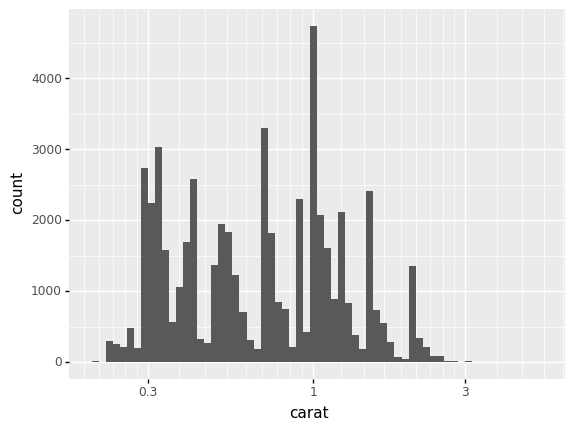

<ggplot: (8776036675178)>

In [15]:
## NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat"))
    + gr.geom_histogram()
    + gr.scale_x_log10(bins=60)
)

Note that the linear scaling led to bars being "squished" at lower values; a log transformation better "spreads out" the data.

```{admonition} Rule of thumb: Use a log-scale when values vary over multiple order-of-magnitude
There is a bit of artistry to deciding when to log transform (or not). A good rule-of-thumb is to log-transform a variable when it varies over multiple order of magnitude. 

However, it's also a good idea to simply "play" with different visuals to see what works for your dataset.
```


### __q5__ Apply log10 scales to both axes

Apply a `log10()` transform to *both* the `x` and `y` axes. 

*Hint*: If `gr.scale_x_log10()` transforms the `x` axis, what might transform the `y` axis?


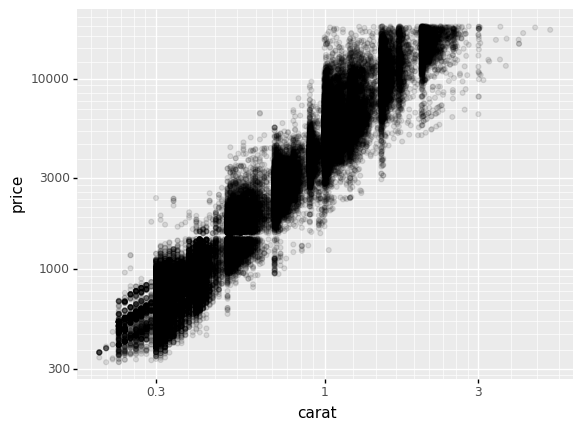

<ggplot: (8776036696715)>

In [16]:
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(alpha=1/10)
    + gr.scale_x_log10()
    + gr.scale_y_log10()
)

# Exercises


### __q6__ Interpret this plot

Inspect the following plot, and answer the questions under *observations* below.


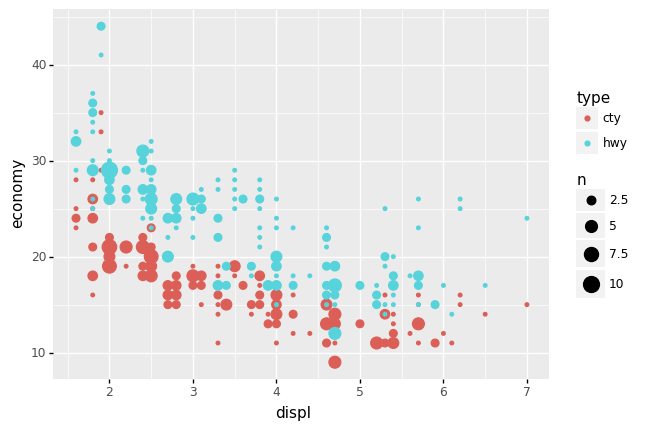

<ggplot: (8776116031368)>

In [17]:
## TASK: No need to edit; run and inspect this plot
(
    df_mpg
    >> gr.tf_pivot_longer(
        columns=["cty", "hwy"],
        names_to="type",
        values_to="economy",
    )
    >> gr.ggplot(gr.aes("displ", "economy", color="type"))
    + gr.geom_count()
)

*Observations*

- Which `displ` values tend to have a higher fuel `economy`?
  - Lower `displ` values tend to yield higher fuel `economy`.
- Which tends to be higher: `cty` or `hwy` fuel `economy`?
  - Generally `hwy` tends to be higher than `cty`; this is not *always* true, though.
- Are there any vehicles that get a `cty` fuel `economy` that is higher than another vehicle's `hwy` fuel `economy`?
  - Yes; in cases where we see a red dot above a blue dot, this indicates that one vehicle's `cty` is higher than another vehicle's `hwy`.
- From this plot, can we tell whether any *single* vehicle has its `cty` value higher than its `hwy` value?
  - We cannot! Note that this visual does not give any indication of which *pairs* of dots are associated. While we expect that `cty <= hwy` for all vehicles, this visual does not give us a means to test that hypothesis.


### __q7__ Interpret this plot

Inspect the following plot, and answer the questions under *observations* below.


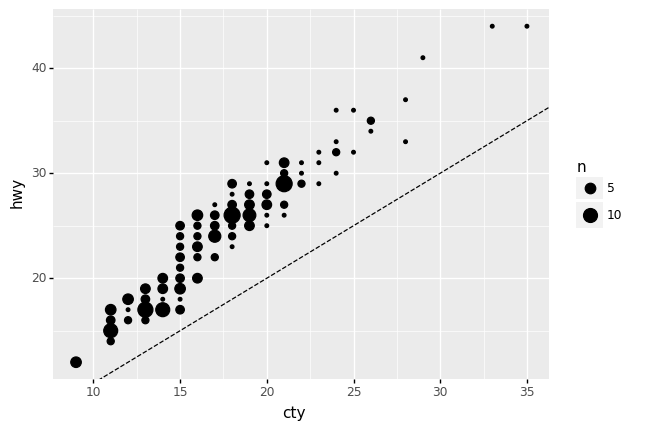

<ggplot: (8776081186958)>

In [18]:
## TASK: No need to edit; run and inspect this plot
(
    df_mpg
    >> gr.ggplot(gr.aes("cty", "hwy"))
    + gr.geom_abline(intercept=0, slope=1, linetype="dashed")
    + gr.geom_count()
)

*Observations*

*Note*: The dashed line above shows the line of `y == x`.

- From this plot, can we tell whether any *single* vehicle has its `cty` value higher than its `hwy` value?
  - Yes! Here every point associates the `cty` and `hwy` values for a single vehicle. Therefore, we can check whether `cty < hwy` simply by checking whether the point falls above the line `y == x`.
<!-- solution-end -->